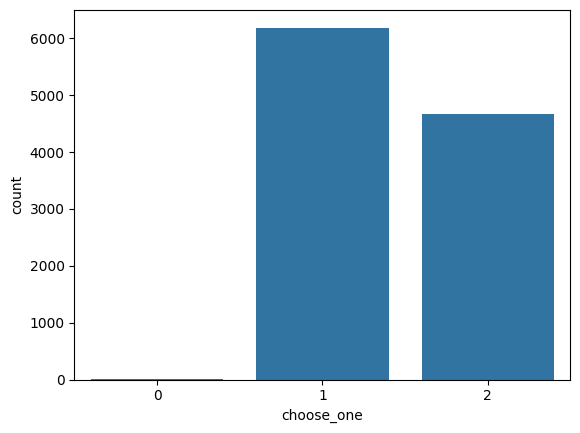

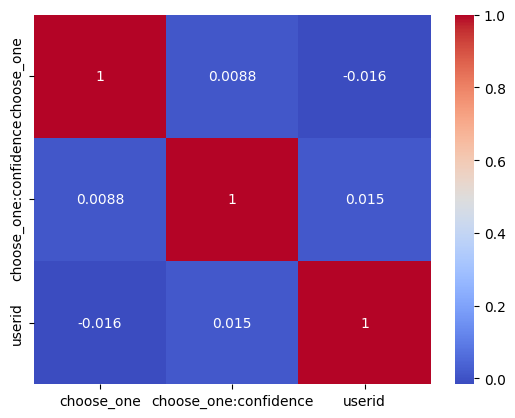

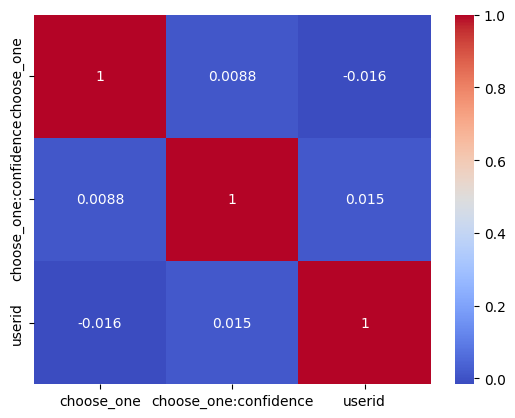

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.64      0.64      0.64      1216
           2       0.54      0.54      0.54       957

    accuracy                           0.59      2176
   macro avg       0.39      0.39      0.39      2176
weighted avg       0.59      0.59      0.59      2176

Accuracy: 0.5932904411764706


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset with a different encoding
df = pd.read_csv('socialmedia-disaster-tweets-DFE.csv', encoding='latin1')

# Display the first few rows of the dataset
df.head()
# Check for missing values and handle them if necessary
df.isnull().sum()
# Encode categorical variables if necessary
df['choose_one'] = df['choose_one'].astype('category').cat.codes

# Drop unnecessary columns
df = df.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'choose_one_gold', 'keyword', 'location', 'text', 'tweetid'])

# Split the dataset into features and target variable
X = df.drop('choose_one', axis=1)
y = df['choose_one']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x='choose_one', data=df)
plt.show()
# Display correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Display correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
